# Simple Linear Regression - Employee Data - Churn out rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
empdata = pd.read_csv("emp_data.csv")

In [4]:
empdata.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [6]:
y = empdata.Churn_out_rate
x1 = empdata.Salary_hike

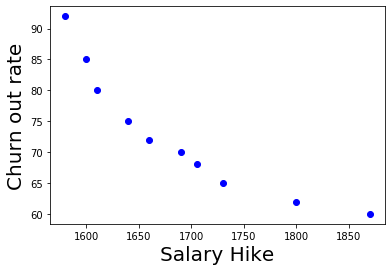

In [7]:
plt.plot(x1,y,'bo')
plt.xlabel('Salary Hike',fontsize=20)
plt.ylabel('Churn out rate',fontsize=20)
plt.show()

In [8]:
y.corr(x1) #correlation co-efficient 

-0.9117216186909112

In [9]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

C:\Users\ABHAY\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\ABHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           0.000239
Time:                        21:49:25   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Correlation co-efficient of transformed variables

In [10]:
y.corr(np.log(x1)) # log transformation on x1 - salary 

-0.9212077312118855

In [11]:
np.log(y).corr(x1) # log transformation on y - Churn out rate

-0.934636070979677

In [12]:
np.log(y).corr(np.log(x1))  # log tansformation on both variables 

-0.9429170434256442

### Correlation is more satisfying by Log transformation on both variables

In [20]:
x = sm.add_constant(np.log(x1))
result_log = sm.OLS(np.log(y),x).fit()
result_log.summary()

C:\Users\ABHAY\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     64.13
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           4.33e-05
Time:                        21:58:49   Log-Likelihood:                 17.167
No. Observations:                  10   AIC:                            -30.33
Df Residuals:                       8   BIC:                            -29.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          22.2472      2.244      9.916      0.000      17.073      27.421
Salary_hike    -2.4180      0.302     -8.008      0.000      -3.114      -1.722
==============================================================================
Omnibus:                        1.962   Durbin-Watson:                   0.597
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.329
Skew:                           0.786   Prob(JB):                        0.515
Kurtosis:                       2.151   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
pred_val = np.exp(result_log.predict(x))

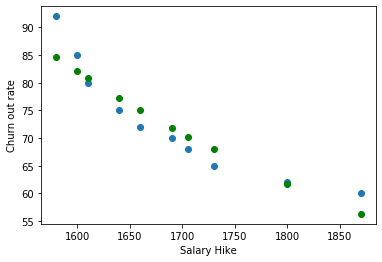

In [22]:
plt.scatter(x1,y)
plt.plot(x1,pred_val,'go')
plt.xlabel('Salary Hike')
plt.ylabel('Churn out rate')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y,pred_val))
print("RMSE for result_log model : {}".format(rmse))

RMSE for result_log model : 3.318328242107705


### We will consider log model as R-squared value is more satisfying!!
### So final equation for our model is as below

## Churn_out_rate = exp(22.247 -2.418(log(Salary_hike)))